<a href="https://colab.research.google.com/github/pnn99/detector_fraude_LLM/blob/main/detector_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


In [3]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [5]:
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#verificação de tipos e valores nulos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#verifica os tipos dos dados não fraude
df_nao_fraude = df_credit.Amount[df_credit.Class == 0]
df_nao_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
#verifica os tipos dos dados de fraude
df_fraude = df_credit.Amount[df_credit.Class == 1]
df_fraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# Contagem das classes (fraude e não fraude)
df_credit.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

\n--- Gerando Gráfico de Desbalanceamento das Classes ---


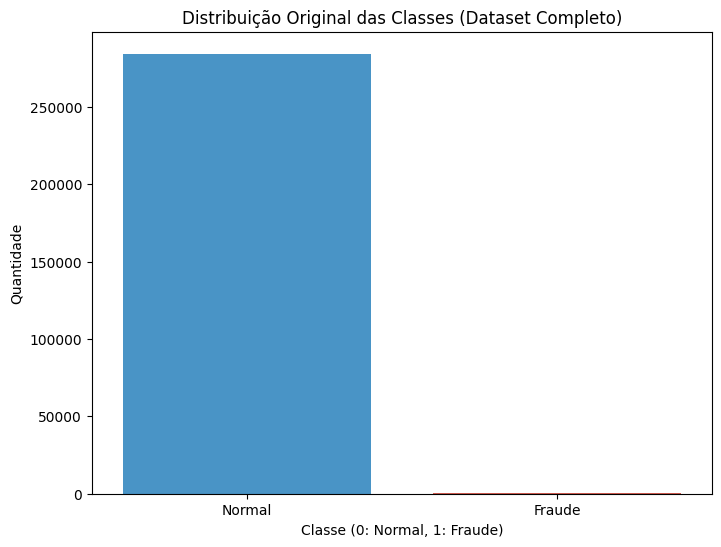

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Gráfico Extra: Desbalanceamento Original das Classes ---
print("\\n--- Gerando Gráfico de Desbalanceamento das Classes ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_credit, palette=['#3498db', '#e74c3c'], hue='Class', legend=False)
plt.title('Distribuição Original das Classes (Dataset Completo)')
plt.xlabel('Classe (0: Normal, 1: Fraude)')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.savefig('class_distribution.png')
plt.show()

In [10]:
#Criação de um novo dataset para utilizar um undersampling para igualar a nossa base de dados
df_fraude = df_credit[df_credit.Class == 1]
df_nao_fraude = df_credit[df_credit.Class == 0]

df_undersampling = df_nao_fraude.sample(n=492)
df_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133171,80280.0,0.747330,-0.421790,1.322430,2.421287,-0.763716,1.059160,-0.749169,0.474033,-0.219847,...,0.379679,0.688613,-0.182504,-0.308344,0.105519,0.128044,0.022688,0.051850,167.34,0
119765,75574.0,-2.478897,-0.624028,1.180555,1.660363,-0.803797,-0.495105,-0.745088,0.975774,0.101314,...,0.114161,0.356159,0.733047,0.392258,-0.346972,-0.399295,0.151924,-0.539540,12.51,0
114400,73466.0,-0.623434,0.954400,1.023935,-0.232038,-0.127935,0.036513,0.023616,0.574587,-0.610203,...,0.179838,0.346714,-0.114323,-0.477567,-0.458185,0.270079,-0.004656,0.081233,16.35,0
275239,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,...,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0
178864,123819.0,-0.389847,1.602566,-0.925622,-0.182722,0.392807,-1.456606,0.713653,0.100640,-0.126113,...,0.283990,1.064477,-0.156457,0.005256,-0.218179,-0.138314,0.378185,0.188694,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146161,87498.0,-0.011374,0.816719,0.351266,-0.690004,0.463993,-0.765365,0.895463,-0.042751,-0.319356,...,-0.197550,-0.415023,0.070492,0.012739,-0.544324,0.120581,0.247484,0.087561,1.78,0
238555,149720.0,-0.002627,0.867706,0.305384,-0.587161,0.546127,-1.035776,1.053803,-0.234398,-0.189910,...,-0.236794,-0.472152,0.086527,0.005261,-0.467680,0.140033,0.253101,0.100175,8.93,0
15008,26337.0,-0.031952,-0.832700,-0.252105,3.955418,0.556630,1.501573,1.003355,0.186943,-1.828635,...,0.446155,0.207440,-0.386124,-0.616144,0.170434,0.114121,-0.064887,0.094071,525.13,0
211370,138383.0,1.011632,-2.366499,-0.059308,0.837894,-0.738091,3.207936,-1.390895,0.922632,2.188628,...,0.405941,0.921207,-0.165246,-0.833289,-0.587307,0.482158,0.034641,0.016686,400.00,0


In [11]:
#concaternar dos dataframes
df_concatenado = pd.concat([df_undersampling, df_fraude], axis=0)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133171,80280.0,0.747330,-0.421790,1.322430,2.421287,-0.763716,1.059160,-0.749169,0.474033,-0.219847,...,0.379679,0.688613,-0.182504,-0.308344,0.105519,0.128044,0.022688,0.051850,167.34,0
119765,75574.0,-2.478897,-0.624028,1.180555,1.660363,-0.803797,-0.495105,-0.745088,0.975774,0.101314,...,0.114161,0.356159,0.733047,0.392258,-0.346972,-0.399295,0.151924,-0.539540,12.51,0
114400,73466.0,-0.623434,0.954400,1.023935,-0.232038,-0.127935,0.036513,0.023616,0.574587,-0.610203,...,0.179838,0.346714,-0.114323,-0.477567,-0.458185,0.270079,-0.004656,0.081233,16.35,0
275239,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,...,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0
178864,123819.0,-0.389847,1.602566,-0.925622,-0.182722,0.392807,-1.456606,0.713653,0.100640,-0.126113,...,0.283990,1.064477,-0.156457,0.005256,-0.218179,-0.138314,0.378185,0.188694,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [12]:
#ajustar o Index
df_concatenado.reset_index(drop=True, inplace=True)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80280.0,0.747330,-0.421790,1.322430,2.421287,-0.763716,1.059160,-0.749169,0.474033,-0.219847,...,0.379679,0.688613,-0.182504,-0.308344,0.105519,0.128044,0.022688,0.051850,167.34,0
1,75574.0,-2.478897,-0.624028,1.180555,1.660363,-0.803797,-0.495105,-0.745088,0.975774,0.101314,...,0.114161,0.356159,0.733047,0.392258,-0.346972,-0.399295,0.151924,-0.539540,12.51,0
2,73466.0,-0.623434,0.954400,1.023935,-0.232038,-0.127935,0.036513,0.023616,0.574587,-0.610203,...,0.179838,0.346714,-0.114323,-0.477567,-0.458185,0.270079,-0.004656,0.081233,16.35,0
3,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,...,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0
4,123819.0,-0.389847,1.602566,-0.925622,-0.182722,0.392807,-1.456606,0.713653,0.100640,-0.126113,...,0.283990,1.064477,-0.156457,0.005256,-0.218179,-0.138314,0.378185,0.188694,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
#retirar dados para validação
df_val_nao_fraude = df_concatenado.head(5)
df_val_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80280.0,0.747330,-0.421790,1.322430,2.421287,-0.763716,1.059160,-0.749169,0.474033,-0.219847,...,0.379679,0.688613,-0.182504,-0.308344,0.105519,0.128044,0.022688,0.051850,167.34,0
1,75574.0,-2.478897,-0.624028,1.180555,1.660363,-0.803797,-0.495105,-0.745088,0.975774,0.101314,...,0.114161,0.356159,0.733047,0.392258,-0.346972,-0.399295,0.151924,-0.539540,12.51,0
2,73466.0,-0.623434,0.954400,1.023935,-0.232038,-0.127935,0.036513,0.023616,0.574587,-0.610203,...,0.179838,0.346714,-0.114323,-0.477567,-0.458185,0.270079,-0.004656,0.081233,16.35,0
3,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,...,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0
4,123819.0,-0.389847,1.602566,-0.925622,-0.182722,0.392807,-1.456606,0.713653,0.100640,-0.126113,...,0.283990,1.064477,-0.156457,0.005256,-0.218179,-0.138314,0.378185,0.188694,4.00,0


In [14]:
df_val_fraude = df_concatenado.tail(5)
df_val_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
983,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [15]:
df_concatenado.drop(df_concatenado.head(5).index, inplace=True)
df_concatenado.drop(df_concatenado.tail(5).index, inplace=True)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,88050.0,1.986909,0.357571,-2.215003,0.553765,0.370385,-1.554669,0.237377,-0.331508,0.998129,...,-0.081352,-0.009643,0.009139,-0.346808,0.158942,-0.515238,0.052264,0.019723,27.74,0
6,155917.0,-0.095900,1.214073,-0.396037,-0.598123,0.957770,-0.661818,1.077742,-0.239546,-0.027446,...,0.345242,1.369038,-0.117313,0.673432,-0.675769,-0.243059,0.623473,0.389497,0.77,0
7,65422.0,1.109387,0.299859,-0.282555,1.019649,0.466846,-0.145584,0.482727,-0.095457,-0.693400,...,0.099339,0.253367,-0.220388,-0.267130,0.790863,-0.255876,-0.002570,0.004747,53.90,0
8,31491.0,-0.557343,0.474584,1.866917,0.756839,-0.271989,-0.315883,0.314778,0.171576,-0.365255,...,-0.066577,-0.204595,-0.051991,0.532854,-0.178289,0.364737,0.061251,0.101517,29.45,0
9,37128.0,1.253186,-0.417846,-0.049950,-0.625370,-0.702471,-0.729433,-0.438428,0.056092,-1.097426,...,-0.245291,-0.991747,0.227871,0.055533,0.012663,-0.638930,0.002375,0.030899,41.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
975,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
976,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
977,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1


In [16]:
#concatenar o dataframe de validação
df_val_total = pd.concat([df_val_nao_fraude, df_val_fraude], axis=0)
df_val_total.reset_index(inplace=True)

df_val_total_real = df_val_total.Class
df_val_total = df_val_total.drop(['index','Time','Class'], axis=1)
df_val_total

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.747330,-0.421790,1.322430,2.421287,-0.763716,1.059160,-0.749169,0.474033,-0.219847,0.703753,...,0.149272,0.379679,0.688613,-0.182504,-0.308344,0.105519,0.128044,0.022688,0.051850,167.34
1,-2.478897,-0.624028,1.180555,1.660363,-0.803797,-0.495105,-0.745088,0.975774,0.101314,-0.805668,...,-0.292467,0.114161,0.356159,0.733047,0.392258,-0.346972,-0.399295,0.151924,-0.539540,12.51
2,-0.623434,0.954400,1.023935,-0.232038,-0.127935,0.036513,0.023616,0.574587,-0.610203,-0.534793,...,-0.109741,0.179838,0.346714,-0.114323,-0.477567,-0.458185,0.270079,-0.004656,0.081233,16.35
3,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,-0.550427,...,0.537641,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39
4,-0.389847,1.602566,-0.925622,-0.182722,0.392807,-1.456606,0.713653,0.100640,-0.126113,-0.714476,...,0.104200,0.283990,1.064477,-0.156457,0.005256,-0.218179,-0.138314,0.378185,0.188694,4.00
5,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
6,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
7,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
8,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00
9,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53


In [17]:
#verificar a distribuição dos dados fraude/não fraude
df_concatenado.Class.value_counts()

Class
0    487
1    487
Name: count, dtype: int64

In [18]:
#separar labels e features
X = df_concatenado.drop(['Time','Class'], axis=1)
Y = df_concatenado['Class']

In [19]:
print(X, Y)

           V1        V2        V3        V4        V5        V6        V7  \
5    1.986909  0.357571 -2.215003  0.553765  0.370385 -1.554669  0.237377   
6   -0.095900  1.214073 -0.396037 -0.598123  0.957770 -0.661818  1.077742   
7    1.109387  0.299859 -0.282555  1.019649  0.466846 -0.145584  0.482727   
8   -0.557343  0.474584  1.866917  0.756839 -0.271989 -0.315883  0.314778   
9    1.253186 -0.417846 -0.049950 -0.625370 -0.702471 -0.729433 -0.438428   
..        ...       ...       ...       ...       ...       ...       ...   
974 -5.766879 -8.402154  0.056543  6.950983  9.880564 -5.773192 -5.748879   
975 -0.956390  2.361594 -3.171195  1.970759  0.474761 -1.902598 -0.055178   
976 -2.027135 -1.131890 -1.135194  1.086963 -0.010547  0.423797  3.790880   
977  2.091900 -0.757459 -1.192258 -0.755458 -0.620324 -0.322077 -1.082511   
978 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136 -0.922038   

           V8        V9       V10  ...       V20       V21       V22  \
5  

In [20]:
#separar entre dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 42)

\n--- Gerando Gráfico de Desbalanceamento das Classes ---


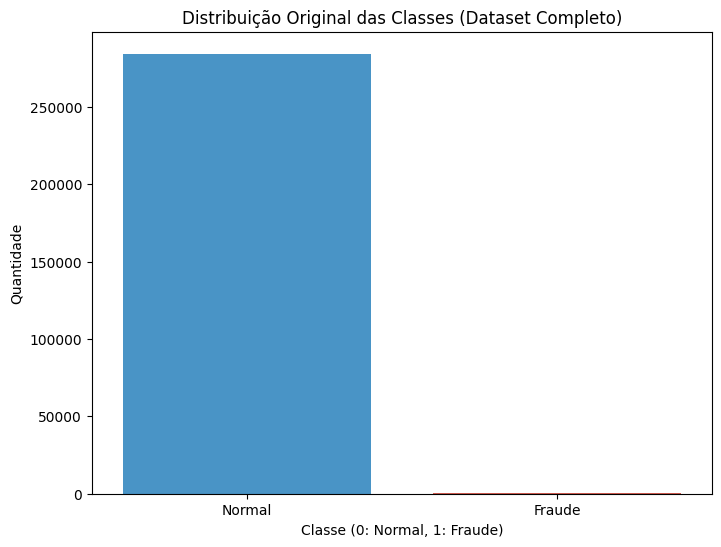

--- Treinando o StackingClassifier ---
Acurácia do StackingClassifier: 93.33%\n
Relatório de Classificação do StackingClassifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93        97

    accuracy                           0.93       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.94      0.93      0.93       195

\n--- Acurácia dos Modelos de Base (Individuais) ---
Acurácia do modelo 'logistic_regression': 95.38%
Acurácia do modelo 'decision_tree': 90.26%
Acurácia do modelo 'random_forest': 93.33%
Acurácia do modelo 'svc': 82.05%
Acurácia do modelo 'gradient_boosting': 93.33%


In [ ]:
# --- Importação dos novos modelos e do StackingClassifier ---
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # <-- ADICIONADO AQUI
from sklearn.metrics import classification_report

# ---------------------------------------------------------------------------------
# PASSO 1: Definir os modelos de base (Nível 0 - Os "Especialistas")
# ---------------------------------------------------------------------------------
# Criamos uma lista de tuplas com o nome e o objeto de cada modelo.
base_models = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)), # <-- ADICIONADO AQUI
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# ---------------------------------------------------------------------------------
# PASSO 2: Definir o Metaclassificador (Nível 1 - O "Gerente")
# ---------------------------------------------------------------------------------
# Usaremos uma Regressão Logística para combinar as previsões dos especialistas.
meta_classifier = LogisticRegression(random_state=42)

# ---------------------------------------------------------------------------------
# PASSO 3: Criar o Stacking Classifier
# ---------------------------------------------------------------------------------
# Juntamos tudo no StackingClassifier.
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5
)

# ---------------------------------------------------------------------------------
# PASSO 4: Treinar e Avaliar o modelo Stacking
# ---------------------------------------------------------------------------------
print("--- Treinando o StackingClassifier ---")
stacking_model.fit(x_train, y_train)
y_pred_stacking = stacking_model.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Acurácia do StackingClassifier: {acc_stacking * 100:.2f}%\\n")
print("Relatório de Classificação do StackingClassifier:")
print(classification_report(y_test, y_pred_stacking))


# ---------------------------------------------------------------------------------
# PASSO 5: Treinar e Avaliar cada modelo de base para comparação
# ---------------------------------------------------------------------------------
print("\\n--- Acurácia dos Modelos de Base (Individuais) ---")
# Criamos um dicionário para guardar os resultados para o gráfico depois
model_accuracies = {}

for name, model in base_models:
    model.fit(x_train, y_train)
    y_pred_base = model.predict(x_test)
    acc_base = accuracy_score(y_test, y_pred_base)
    model_accuracies[name] = acc_base # Guarda a acurácia
    print(f"Acurácia do modelo '{name}': {acc_base * 100:.2f}%")

# Adicionamos também a acurácia do Stacking para comparação
model_accuracies['stacking'] = acc_stacking

In [22]:
# --- Validação Comparativa (1ª Rodada - Modelos Padrão) ---

# 1. Criar o DataFrame para os resultados desta rodada
df_validacao_rodada1 = pd.DataFrame({'Real': df_val_total_real})

# 2. Reinstanciar e treinar os modelos com parâmetros padrão
#    para garantir que estamos usando as versões não otimizadas.

# Lista dos modelos de base padrão
base_models_padrao = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Treinando cada modelo individualmente e fazendo a previsão
print("--- Gerando previsões para os modelos padrão individuais ---")
for name, model in base_models_padrao:
    model.fit(x_train, y_train)
    df_validacao_rodada1[f'Prev ({name})'] = model.predict(df_val_total)

# 3. Treinar o StackingClassifier com os modelos padrão e fazer a previsão
print("--- Gerando previsões para o StackingClassifier padrão ---")
stacking_model_padrao = StackingClassifier(
    estimators=base_models_padrao,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)
stacking_model_padrao.fit(x_train, y_train)
df_validacao_rodada1['Prev (STACKING PADRÃO)'] = stacking_model_padrao.predict(df_val_total)

# 4. Reorganizar as colunas para uma melhor visualização e exibir o DataFrame
colunas_ordenadas = [
    'Real',
    'Prev (logistic_regression)',
    'Prev (random_forest)',
    'Prev (svc)',
    'Prev (gradient_boosting)',
    'Prev (STACKING PADRÃO)',
    'Prev (decision_tree)'  # <-- ADICIONADO AQUI
]
df_validacao_rodada1 = df_validacao_rodada1[colunas_ordenadas]

print("\n--- Painel de Validação (1ª Rodada - Modelos Padrão) ---")
df_validacao_rodada1

--- Gerando previsões para os modelos padrão individuais ---
--- Gerando previsões para o StackingClassifier padrão ---

--- Painel de Validação (1ª Rodada - Modelos Padrão) ---


,Real,Prev (logistic_regression),Prev (random_forest),Prev (svc),Prev (gradient_boosting),Prev (STACKING PADRÃO),Prev (decision_tree)
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1
6,1,1,1,0,1,1,1
7,1,1,1,0,1,1,1
8,1,1,1,1,1,1,1
9,1,0,0,0,0,0,0


\n==================================================
INICIANDO ANÁLISE VISUAL DA 1ª RODADA (MODELOS PADRÃO)
==================================================\n


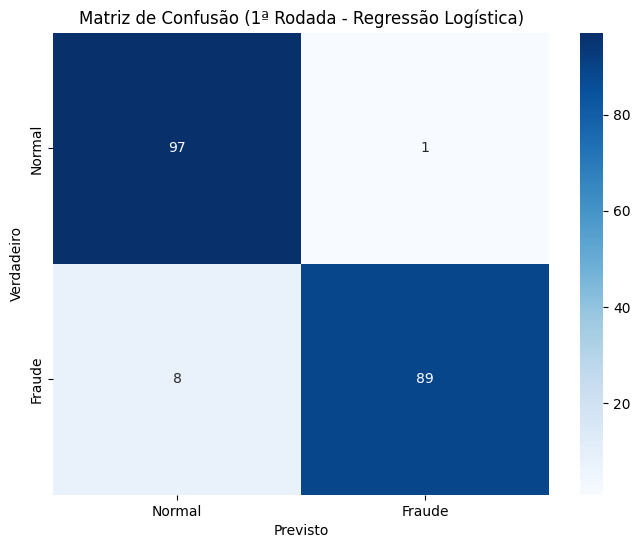

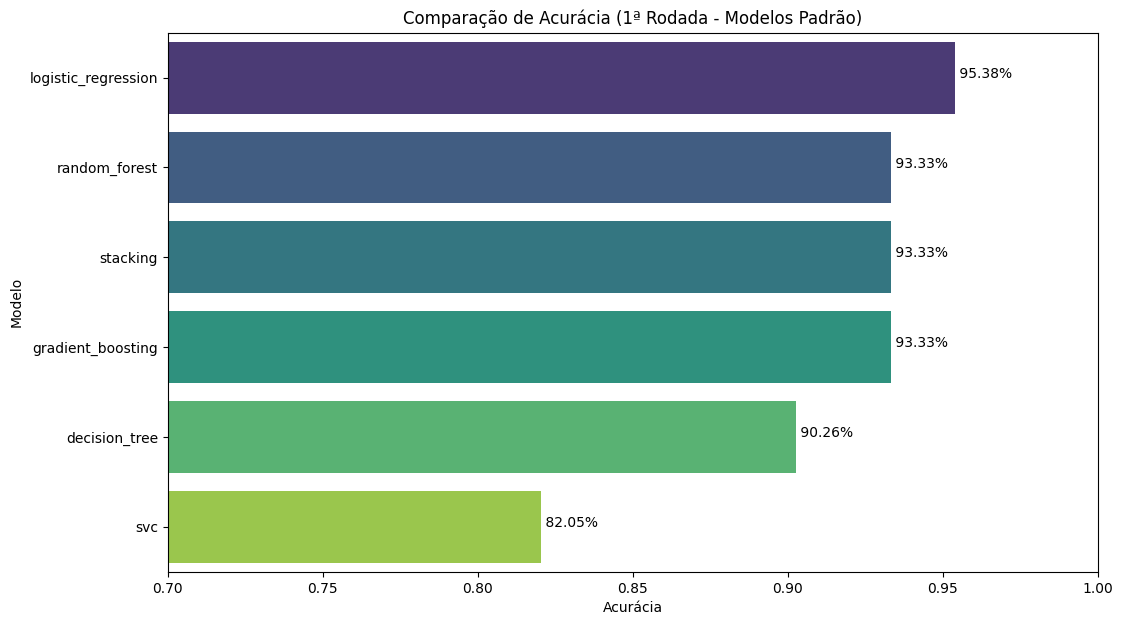

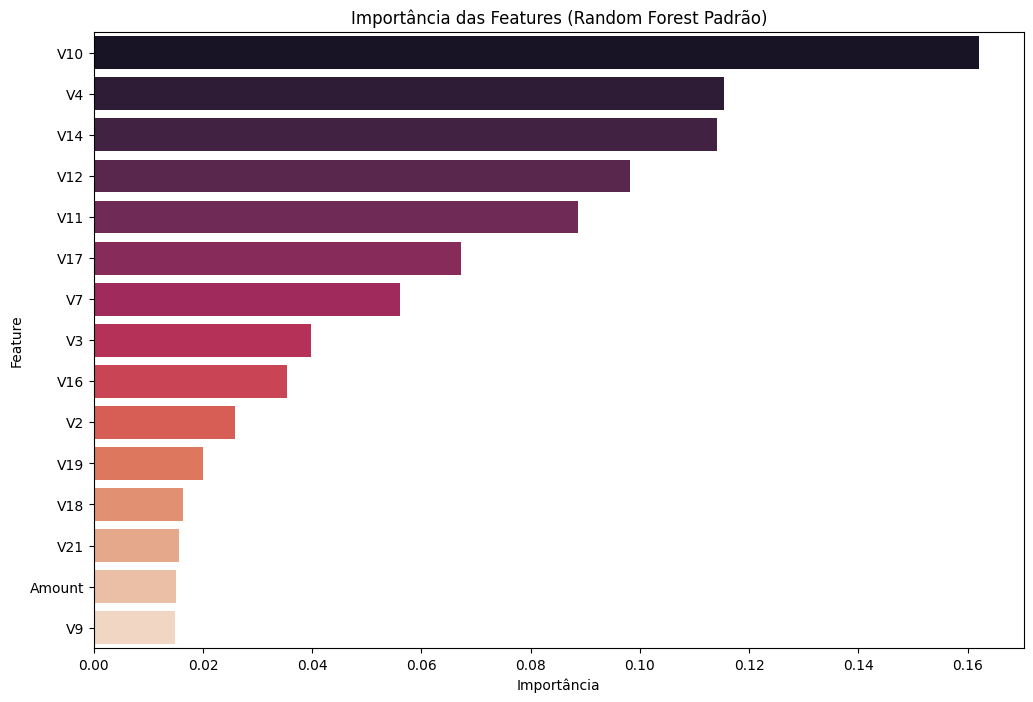

\n--- Gerando Gráfico de Desbalanceamento das Classes ---


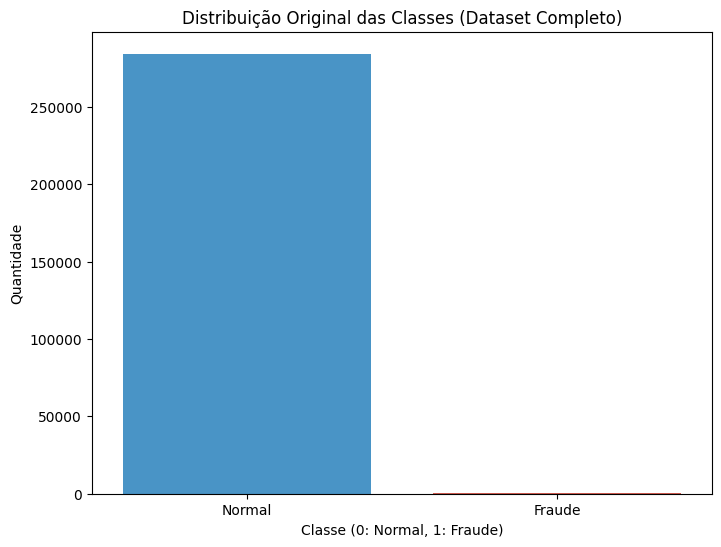

In [ ]:
# --- GRÁFICOS E ANÁLISES DA 1ª RODADA (MODELOS PADRÃO) ---

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("\\n" + "="*50)
print("INICIANDO ANÁLISE VISUAL DA 1ª RODADA (MODELOS PADRÃO)")
print("="*50 + "\\n")


# --- Gráfico 1: Matriz de Confusão (Melhor Modelo da Rodada: Regressão Logística) ---

# O melhor modelo desta rodada foi a Regressão Logística, vamos usá-lo.
best_model_round1 = LogisticRegression(max_iter=1000, random_state=42)
best_model_round1.fit(x_train, y_train)
y_pred_round1 = best_model_round1.predict(x_test)

cm_round1 = confusion_matrix(y_test, y_pred_round1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_round1, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusão (1ª Rodada - Regressão Logística)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.savefig('confusion_matrix_round1.png')
plt.show()


# --- Gráfico 2: Comparação de Acurácia dos Modelos (Padrão) ---

# Usando o dicionário 'model_accuracies' que foi criado na célula anterior
df_accuracies_round1 = pd.DataFrame(list(model_accuracies.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies_round1, palette='viridis', orient='h', hue='Modelo', legend=False)
plt.title('Comparação de Acurácia (1ª Rodada - Modelos Padrão)')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.7, 1.0) # Ajuste para dar destaque
for index, value in enumerate(df_accuracies_round1['Acurácia']):
    plt.text(value, index, f' {value*100:.2f}%')
plt.savefig('accuracy_comparison_round1.png')
plt.show()

# --- Gráfico 3: Importância das Features (Random Forest Padrão) ---

# Usando o modelo RandomForest com parâmetros padrão treinado na célula anterior
rf_model_padrao = RandomForestClassifier(random_state=42)
rf_model_padrao.fit(x_train, y_train)

feature_importances_padrao = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_padrao.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_padrao.head(15), palette='rocket', orient='h', hue='feature', legend=False)
plt.title('Importância das Features (Random Forest Padrão)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importance_round1.png')
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV

# --- PASSO 1: Otimização do RandomForestClassifier ---

print("--- Iniciando a Otimização para o RandomForestClassifier ---")

# Definindo o "cardápio" de parâmetros que o GridSearchCV vai testar
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [10, 20, 30],         # Profundidade máxima
    'criterion': ['gini', 'entropy']     # Critério de divisão
}

# Configurando o GridSearchCV
# cv=5 significa que usaremos validação cruzada de 5 folds
# n_jobs=-1 usa todos os processadores disponíveis para acelerar o processo
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2 # O verbose=2 mostra o progresso do treinamento
)

# Rodando a busca pelos melhores parâmetros
grid_search_rf.fit(x_train, y_train)

print("\n--- Otimização do RandomForestClassifier Concluída! ---")
print(f"Melhores parâmetros encontrados: {grid_search_rf.best_params_}")

# Guardando o melhor modelo encontrado
best_rf = grid_search_rf.best_estimator_

# --- PASSO 2: Otimização do SVC ---

print("\n--- Iniciando a Otimização para o SVC ---")

# "Cardápio" de parâmetros para o SVC
param_grid_svc = {
    'C': [0.1, 1, 10],            # Parâmetro de regularização
    'gamma': ['scale', 'auto'],     # Coeficiente do kernel
    'kernel': ['rbf']               # Vamos focar no kernel RBF que é muito poderoso
}

# Configurando o GridSearchCV para o SVC
grid_search_svc = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svc,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Rodando a busca
grid_search_svc.fit(x_train, y_train)

print("\n--- Otimização do SVC Concluída! ---")
print(f"Melhores parâmetros encontrados: {grid_search_svc.best_params_}")

# Guardando o melhor modelo SVC
best_svc = grid_search_svc.best_estimator_

--- Iniciando a Otimização para o RandomForestClassifier ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- Otimização do RandomForestClassifier Concluída! ---
Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}

--- Iniciando a Otimização para o SVC ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Otimização do SVC Concluída! ---
Melhores parâmetros encontrados: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [25]:
# --- PASSO FINAL: Montando e Avaliando o StackingClassifier OTIMIZADO ---

print("--- Montando o StackingClassifier com os melhores parâmetros ---")

# 1. Definir a lista de modelos de base OTIMIZADA
base_models_optimized = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest_otimizado', best_rf), 
    ('svc_otimizado', best_svc),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# 2. Definir o Metaclassificador (pode ser o mesmo de antes)
meta_classifier_final = LogisticRegression(random_state=42)

# 3. Criar o Stacking Classifier OTIMIZADO
stacking_model_optimized = StackingClassifier(
    estimators=base_models_optimized,
    final_estimator=meta_classifier_final,
    cv=5,
    n_jobs=-1
)

# 4. Treinar e Avaliar o modelo final
print("--- Treinando o StackingClassifier OTIMIZADO ---")
stacking_model_optimized.fit(x_train, y_train)
y_pred_stacking_optimized = stacking_model_optimized.predict(x_test)
acc_stacking_optimized = accuracy_score(y_test, y_pred_stacking_optimized)

print("\n--- RESULTADO FINAL ---")
print(f"Acurácia do StackingClassifier OTIMIZADO: {acc_stacking_optimized * 100:.2f}%\n")
print("Relatório de Classificação do StackingClassifier OTIMIZADO:")
print(classification_report(y_test, y_pred_stacking_optimized))

# Vamos também reavaliar a performance do SVC otimizado sozinho para ver o quanto ele melhorou
print("\n--- Verificando a melhoria do SVC Otimizado (Individual) ---")
svc_optimized_solo = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svc_optimized_solo.fit(x_train, y_train)
acc_svc_optimized = accuracy_score(y_test, svc_optimized_solo.predict(x_test))
print(f"Acurácia do SVC OTIMIZADO: {acc_svc_optimized * 100:.2f}%")

--- Montando o StackingClassifier com os melhores parâmetros ---
--- Treinando o StackingClassifier OTIMIZADO ---

--- RESULTADO FINAL ---
Acurácia do StackingClassifier OTIMIZADO: 93.33%

Relatório de Classificação do StackingClassifier OTIMIZADO:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93        97

    accuracy                           0.93       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.94      0.93      0.93       195


--- Verificando a melhoria do SVC Otimizado (Individual) ---
Acurácia do SVC OTIMIZADO: 88.21%


In [26]:
# --- Validação Final Comparativa ---

# 1. Vamos criar um DataFrame para armazenar os resultados.
# A primeira coluna é o valor real, que já separamos no início.
df_validacao = pd.DataFrame({'Real': df_val_total_real})


# 2. Agora, vamos adicionar a previsão de cada um dos nossos modelos como uma nova coluna.
#    Usaremos os modelos já treinados nas etapas anteriores.

# Modelo de Regressão Logística (o primeiro que treinamos)
lr_final = LogisticRegression(max_iter=1000, random_state=42)
lr_final.fit(x_train, y_train)
df_validacao['Prev (Logística)'] = lr_final.predict(df_val_total)

df_validacao['Prev (Decision Tree)'] = DecisionTreeClassifier(random_state=42).fit(x_train, y_train).predict(df_val_total)

# Melhor RandomForest (encontrado pelo GridSearchCV)
# A variável 'best_rf' já foi treinada pelo GridSearchCV
df_validacao['Prev (RandomForest Otimizado)'] = best_rf.predict(df_val_total)

# Melhor SVC (encontrado pelo GridSearchCV)
# A variável 'best_svc' já foi treinada pelo GridSearchCV
df_validacao['Prev (SVC Otimizado)'] = best_svc.predict(df_val_total)

# Modelo Stacking Otimizado (nosso modelo final)
df_validacao['Prev (STACKING OTIMIZADO)'] = stacking_model_optimized.predict(df_val_total)


# 3. Exibir o DataFrame comparativo
print("--- Painel de Validação Final ---")
print("Comparando o valor Real com a previsão de cada modelo:")
df_validacao

--- Painel de Validação Final ---
Comparando o valor Real com a previsão de cada modelo:


,Real,Prev (Logística),Prev (Decision Tree),Prev (RandomForest Otimizado),Prev (SVC Otimizado),Prev (STACKING OTIMIZADO)
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,1,1,1,1,1
9,1,0,0,0,0,0


\n==================================================
INICIANDO ANÁLISE VISUAL FINAL (MODELOS OTIMIZADOS)
==================================================\n


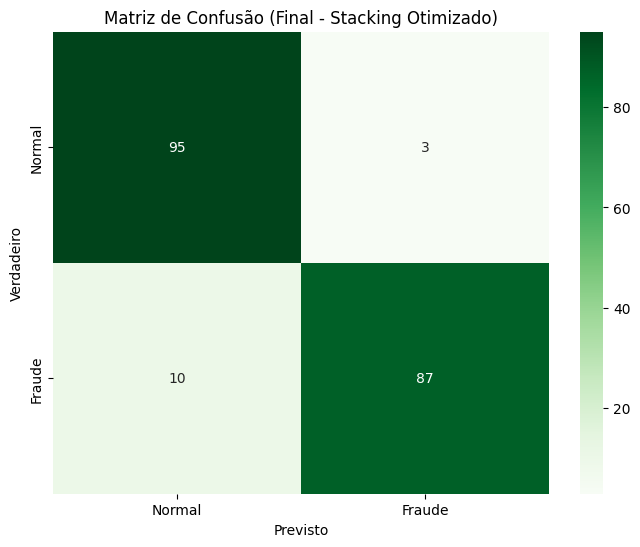

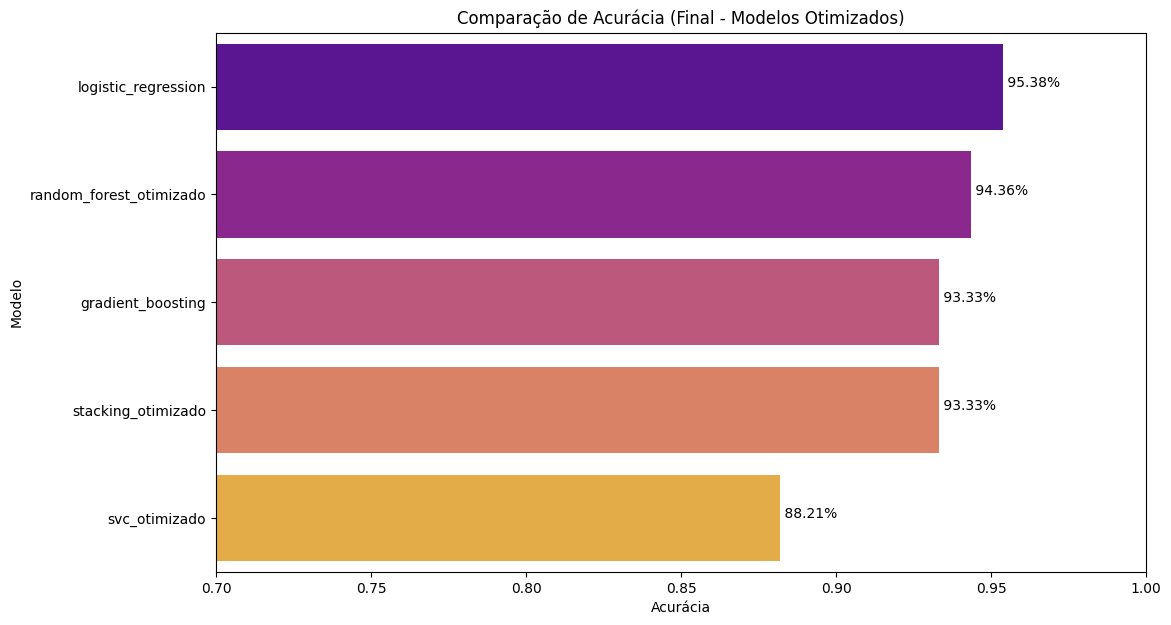

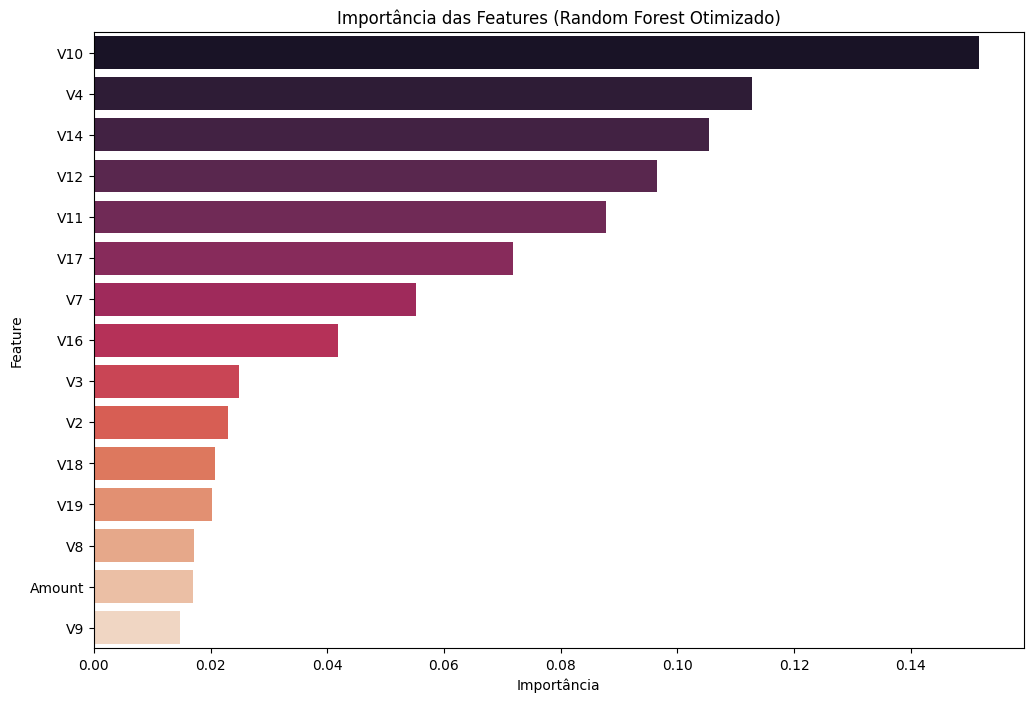

In [27]:
# --- GRÁFICOS E ANÁLISES FINAIS (APÓS OTIMIZAÇÃO) ---

print("\\n" + "="*50)
print("INICIANDO ANÁLISE VISUAL FINAL (MODELOS OTIMIZADOS)")
print("="*50 + "\\n")

# --- Gráfico 1: Matriz de Confusão (Modelo Final: Stacking Otimizado) ---

cm_final = confusion_matrix(y_test, y_pred_stacking_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusão (Final - Stacking Otimizado)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.savefig('confusion_matrix_final.png')
plt.show()

# --- Gráfico 2: Comparação de Acurácia dos Modelos (Otimizados) ---

# Precisamos primeiro coletar a acurácia dos modelos otimizados
model_accuracies_optimized = {}

# Reavaliando os modelos individuais com os melhores parâmetros
lr_final = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
model_accuracies_optimized['logistic_regression'] = accuracy_score(y_test, lr_final.predict(x_test))

# 'best_rf' e 'best_svc' já foram treinados pelo GridSearchCV
model_accuracies_optimized['random_forest_otimizado'] = accuracy_score(y_test, best_rf.predict(x_test))
model_accuracies_optimized['svc_otimizado'] = accuracy_score(y_test, best_svc.predict(x_test))

gb_final = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)
model_accuracies_optimized['gradient_boosting'] = accuracy_score(y_test, gb_final.predict(x_test))

# Adicionando a acurácia do stacking otimizado
model_accuracies_optimized['stacking_otimizado'] = acc_stacking_optimized

# Criando o DataFrame e o gráfico
df_accuracies_final = pd.DataFrame(list(model_accuracies_optimized.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies_final, palette='plasma', orient='h',hue='Modelo', legend=False)
plt.title('Comparação de Acurácia (Final - Modelos Otimizados)')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.7, 1.0)
for index, value in enumerate(df_accuracies_final['Acurácia']):
    plt.text(value, index, f' {value*100:.2f}%')
plt.savefig('accuracy_comparison_final.png')
plt.show()


# --- Gráfico 3: Importância das Features (Random Forest Otimizado) ---

# Usando o 'best_rf' que já é o modelo RandomForest otimizado
feature_importances_otimizado = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_otimizado.head(15), palette='rocket', orient='h', hue='feature', legend=False)
plt.title('Importância das Features (Random Forest Otimizado)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importance_final.png')
plt.show()